<font color = 'red' size = '5'>ch01_영상처리 개요</font>
# 1절 이미지 읽기/쓰기

- pip install opencv-python: 파이썬용 openCV 설치
- pip install opencv-contrib-python: 추가 cv 모듈
- openCV는 numpy 패키지 필수 설치

In [1]:
! pip install opencv-contrib-python

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(577, 700, 3) (577, 700, 3)


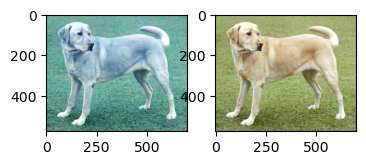

In [8]:
# sol 1)
image_bgr = cv2.imread('data/sample.jpg', cv2.IMREAD_ANYCOLOR) # BGR Format Numpy
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
print(image_bgr.shape, image_rgb.shape)

fig, axes = plt.subplots(1, 2, # 1행 2열
                         figsize = (4, 2)) 
axes[0].imshow(image_bgr)
axes[1].imshow(image_rgb)
plt.show()

In [12]:
# Numpy Array를 이미지 파일로 저장
# 폴더가 없으면 False, 결과가 True면 저장 성공
cv2.imwrite('data/openCV/bgr.jpg', image_bgr) # cv2로 저장 시 bgr포맷으로 변경된 Numpy를 저장
cv2.imwrite('data/openCV/rgb.jpg', image_rgb)

True

(577, 700) (577, 700, 3)


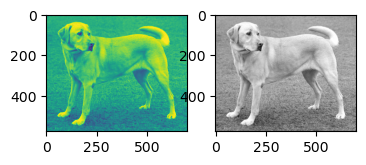

In [22]:
image_gray = cv2.imread('data/sample.jpg', cv2.IMREAD_GRAYSCALE) # GRAY Format Numpy
image_grgb = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2RGB)        # GRAY → RGB
print(image_gray.shape, image_grgb.shape)
fig, axes = plt.subplots(1, 2, # 1행 2열
                         figsize = (4, 2)) 
axes[0].imshow(image_gray)
axes[1].imshow(image_grgb)
plt.show()

In [23]:
# Numpy Array를 이미지 파일로 저장
cv2.imwrite('data/openCV/gray.jpg', image_gray)
cv2.imwrite('data/openCV/grgb.jpg', image_grgb)

True

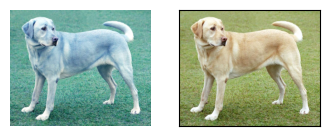

In [40]:
# sol 2)
# BGR Format 이미지의 B, G, R 채널값 조정하여 RGB Format으로 변경
image_bgr = cv2.imread('data/sample.jpg', cv2.IMREAD_ANYCOLOR)
b, g, r   = cv2.split(image_bgr)
# b[0], b.shape
image_rgb = cv2.merge([r, g, b]) # Format 변경
fig, axes = plt.subplots(1, 2, # 1행 2열
                         figsize = (4, 2)) 
axes[0].imshow(image_bgr)
axes[0].axis('off')    # 축 생략
axes[1].imshow(image_rgb)
axes[1].set_xticks([]) # x, y축값에 빈 리스트 삽입
axes[1].set_yticks([])
plt.show()

# 2. 도형그리기

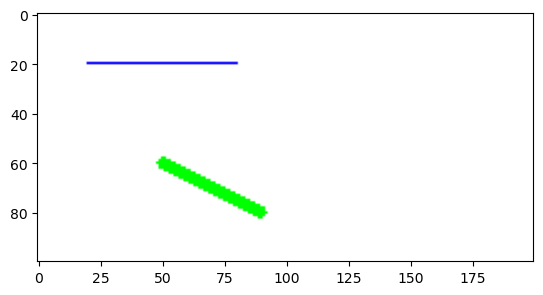

In [54]:
# cv2를 이용한 선 그리기
# np.full(): 모든 값이 사용자 지정값인 배열 생성
img = np.full((100, 200, 3),     # 100 x 200 x 3 배열
              255,               # 배열 내 채울 값(white)
              dtype = np.uint8,) # 배열 내 값 타입은 부호가 없는 정수(unsigned int, 8bit)

cv2.line(img,         # img위에 line을 추가
         (20, 20),    # 선 시작점 (x, y)
         (80, 20),    # 선 끝점 (x, y)
         (255, 0, 5), # 선 색상 cv2에서는 순서 BGR
         1,           # 선 굵기
        )
cv2.line(img, 
         (50, 60), 
         (90, 80), 
         (0, 255, 0), 
         3)
cv2.imwrite('data/openCV/line.png', img) # 저장 시 순서는 BGR
# cv2에도 imshow 있음
# 첫 번째 param은 title
# cv2.imshow('line', img) # BGR Format으로 출력 
# cv2.waitKey(0)          # 키보드 입력할 때까지 대기
# cv2.destroyAllWindows() # openCV 창 모두 닫기
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

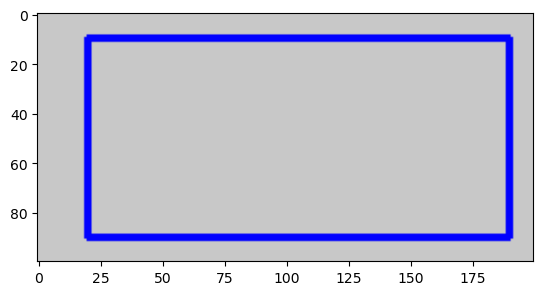

In [61]:
# cv2를 이용한 사각형 그리기
# np.full(): 모든 값이 사용자 지정값인 배열 생성
img = np.full((100, 200, 3),
              200, # 회색
              dtype = 'uint8',
             )
cv2.rectangle(img,
              (20, 10),    # 사각형 왼쪽 위 좌표
              (190, 90),   # 사각형 오른쪽 아래 좌표
              (255, 0, 0), # 사각형 색상 BGR Format
              2            # 테두리 굵기
             )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

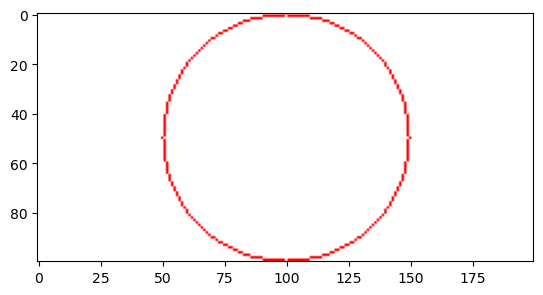

In [64]:
# cv2를 이용한 원 그리기
img = np.full((100, 200, 3),
              255,
              dtype = np.uint8)
cv2.circle(img, 
           (100, 50),    # 원 중심점 (x, y)
           50,          # 반지름
           (255, 0, 0), # 원 색상
           # 테두리 굵기 생략 시 1
          )
plt.imshow(img)
plt.show()

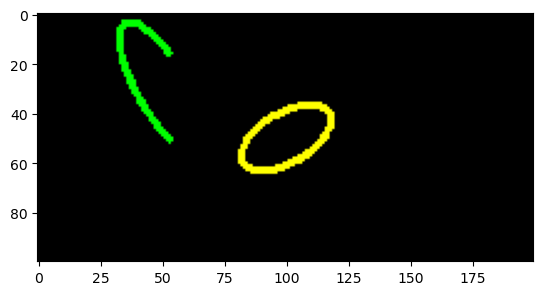

In [83]:
# cv2를 이용한 호/타원 그리기, ellipse
# np.zeros(): 모든 값이 0인 배열 생성
img = np.zeros((100, 200, 3),
               dtype = np.uint8)

# 타원
cv2.ellipse(img, 
            (100, 50),     # 타원의 중심 (x, y)
            (20, 10),      # 두 축의 반지름(가로, 세로)
            -30,           # 반시계 방향 30도 회전
            0, 360,        # 타원의 시작~끝 각도
            (0, 255, 255), # 노랑색
            2              # 테두리 굵기
           )

# 호
cv2.ellipse(img, 
            (50, 30),     # 타원의 중심 (x, y)
            (30, 10),     # 두 축의 반지름(가로, 세로)
            60,           # 반시계 방향 30도 회전
            50, 250,      # 타원의 시작~끝 각도
            (0, 255, 0),  # 초록색
            2             # 테두리 굵기
           )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

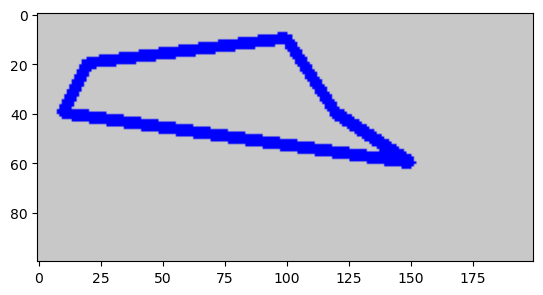

In [86]:
# cv2를 이용한 다각형 그리기, polylines
img = np.full((100, 200, 3),
              200, 
              dtype = np.uint8)
points = np.array([[10, 40],
                   [20, 20],
                   [100, 10],
                   [120, 40],
                   [150, 60]]) # 꼭짓점 좌표들 (x, y)
cv2.polylines(img,
              [points],
              True,       # 닫힌 다각형 # False: 열린 다각형
              (255, 0, 0),
              3           # 테두리 굵기
             )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

(577, 700, 3)


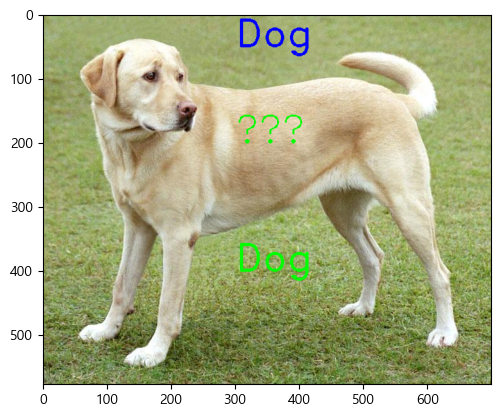

In [111]:
# 문자열 표시하기
img = cv2.imread('data/sample.jpg')
print(img.shape)
cv2.putText(img,
            'Dog',                   # 표시될 문자열
            (300, 50),               # 문자열이 표시될 좌표 (x, y)
            cv2.FONT_HERSHEY_DUPLEX, # font
            2,                       # font scale
            (255, 0, 0),             # font color
            2,                       # font 두께
            )
# 한글 깨짐 현상
cv2.putText(img, 
            '개',            # 표시될 문자열
            (300, 200),      # 문자열이 표시될 좌표 (x, y)
            cv2.FONT_ITALIC, # 이탤릭체
            2,               # font scale
            (0, 255, 0),     # font color
            2,               # font 두께
           )
cv2.putText(img, 
            'Dog',                   # 표시될 문자열
            (300, 400),              # 문자열이 표시될 좌표 (x, y)
            cv2.FONT_HERSHEY_DUPLEX, # 이탤릭체
            2,                       # font scale
            (0, 255, 0),             # font color
            2,                       # font 두께
           )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.rc('font', family='Malgun Gothic')
# plt.text(300, 450, '강아지')
plt.show()
# cv2.imwrite('delete.jpg', img)
# plt에서 한글설정 바꿔도 cv2 저장 시 적용 불가

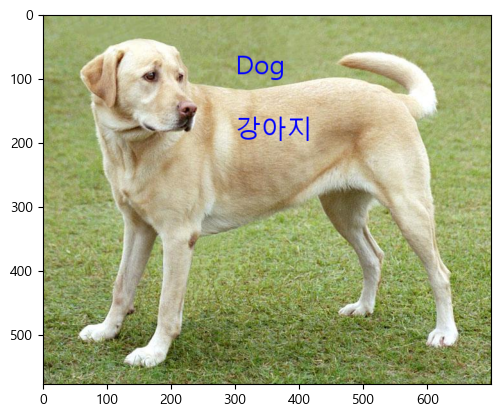

True

In [118]:
# cv2에서 한글 적용 불가, 
from PIL import Image, ImageDraw, ImageFont
img     = cv2.imread('data/sample.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Numpy Array
img_pil = Image.fromarray(img)                 # Array → Image 형변환
draw    = ImageDraw.Draw(img_pil)              # 이미지에 글씨를 Draw하는 객체
font    = ImageFont.truetype('malgun.ttf', 40)

# text 추가
draw.text((300, 50),          # 글씨 위치 (x, y)
          'Dog',              # 입력할 text
          font = font,
          fill = (255, 0, 0),
          )
draw.text((300, 150),
          '강아지',
          font = font,
          fill = (255, 0, 0),
          )

img = np.array(img_pil)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite('data/openCV/sample.jpg', img)